Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Altitude at which Alan deploys parachute: -2061.1348562299245


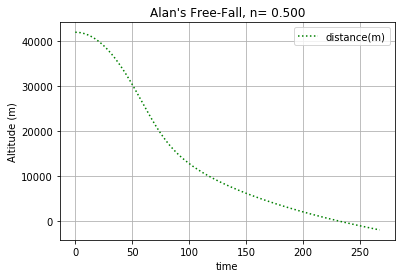

Altitude at which Alan deploys parachute: -967.7119585271284


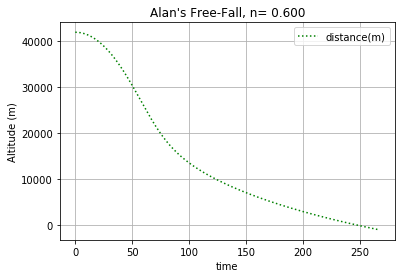

Altitude at which Alan deploys parachute: -45.18405554225319


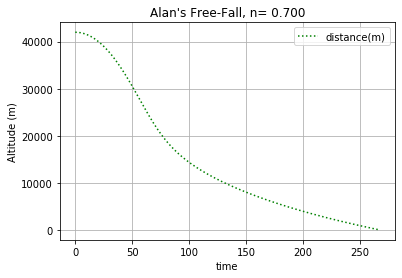

Altitude at which Alan deploys parachute: 406.7743916446416


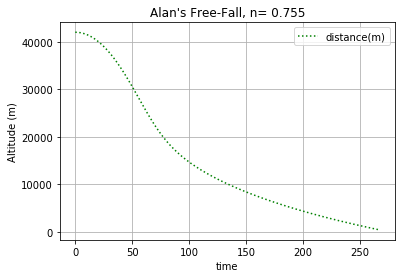

Altitude at which Alan deploys parachute: 446.19287580901437


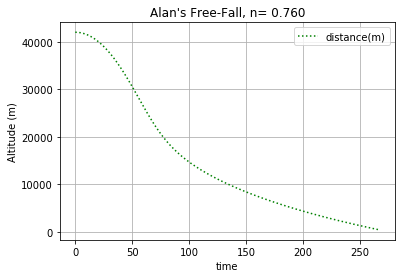

Altitude at which Alan deploys parachute: 752.3828253281899


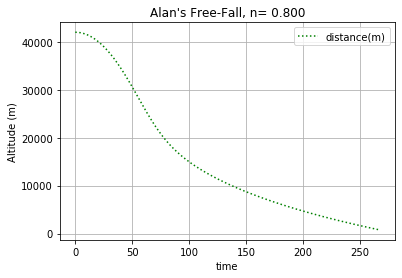

Altitude at which Alan deploys parachute: 6176.7520003808895


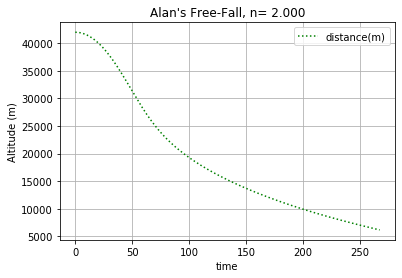

In [1]:
%reset

#import modules 
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint  # this is needed to integrate the differential equation(s)

#Parameters 
x0 = 42000.0 # Initial height
re = 6371000 # Earth's radius in meters
g0 = 9.8 # Earth's gravitation force in m/s
M = 180 # mass of Alan in kg

# Define function 'Alan';generates velocity and acceleration with initial conditions 
def Alan(y, t, n):
    
    global x0, re, g0, M
    
    h = x0 - y[0] # altitutde in meters
    v = y[1] # velocity picked from y matrix
    
    #Gravitational Acceleration eqn
    ga = g0*(re/(re + h))**2  
    
    #Air Resistance eqn 
    c = n*np.exp(-h/6450) #drag coefficient 
    ca = ((c/M)*abs(v)*(v)) 
    #c = 0.75555*np.exp(-h/6450) 
   
    dy1dt = y[1] # which is the velocity
    dy2dt = ga - ca  
    return (dy1dt, dy2dt) # returns [velocity, accelearation]
      
# Initial conditions
v0 = 0.0 # initial velocity
y0 = [0.0, v0] #Due to setting of co-ordinates to Earth's origin, initial distance = 0.0 

#range of n values to test effect of different drag-coefficients on Alan's free-fall
nVals = [0.5, 0.6, 0.7, 0.755,0.76, 0.8, 2.0]

# Generate timepoints
t = np.linspace(0, 4*60+27, 2000) # For Alan's free-fall of 4 min 27s

for n in nVals:
    y = odeint(Alan, y0, t, args=(n, ))
    dist =  x0 - np.array(y[:,0]) # Alan's altitude 
    vel = y[:,1] # Alan's velocity 

    print("Altitude at which Alan deploys parachute:",dist[-1])
    
    # plot the altitude graph
    plt.plot(t, dist, 'g:', label = 'distance(m)')
    plt.title("Alan's Free-Fall, n= %.3f" % (n))
    plt.ylabel('Altitude (m)')
    plt.xlabel('time')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.show()


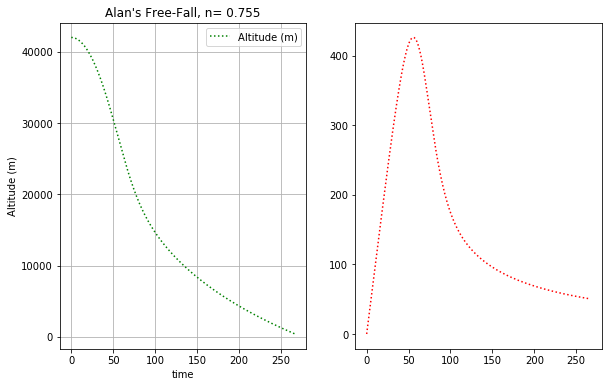

In [2]:
#From above, at air resistance where n=0.755 was deemed to be the most feasible altitude (closest to Earth) at which Alan can deploy his Parachute

n = 0.755
y = odeint(Alan, y0, t, args=(n,))
dist =  x0 - np.array(y[:,0]) # Alan's altitude 
vel = y[:,1] # Alan's velocity 

#plot distance-time graph
plt.figure(1,(15.0,6.0))
plt.subplot(1,3,1)
plt.plot(t, dist, 'g:', label = 'Altitude (m)')
plt.title("Alan's Free-Fall, n= %.3f" % (n))
plt.ylabel('Altitude (m)')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid(True)

#plot velocity-time graph
plt.subplot(1,3,2)
plt.plot(t, vel, 'r:')

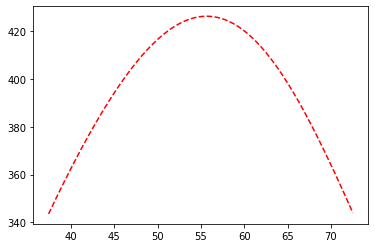

In [16]:
# dictionary with times where the velocity is greater than the speed of sound
mach_dict = {t: vel for t, vel in zip(t, vel) if vel>343.0}

x = list(mach_dict.keys())
y = list(mach_dict.values())

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(x, y, 'r--')

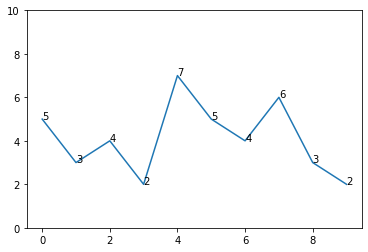

In [12]:
import numpy
from matplotlib import pyplot

x = numpy.arange(10)
y = numpy.array([5,3,4,2,7,5,4,6,3,2])

fig = pyplot.figure()
ax = fig.add_subplot(111)
ax.set_ylim(0,10)
pyplot.plot(x,y)
for i,j in zip(x,y):
    ax.annotate(str(j),xy=(i,j))

pyplot.show()

In [ ]:
#print(vel[300], t[300])
for i in (t, vel):
    if(i[1]>343.0):
        print(i)
#426.01853568

# print(vel[279:425])
# print(vel[279],t[279])

plt.axhline(y = 343.0, color="black")
plt.title("Alan's Free-Fall, n= %.3f" % (n))
plt.ylabel('Velocity (m/s)')
plt.xlabel('time')
plt.legend(('Velocity (m/s) ','Speed of Sound'),loc='best')
plt.grid(True)
    
    
#Plot acceleration-time graph 
plt.subplot(1,3,3)
a = np.zeros(2000)  

for i in range(0, 2000):   # at each time point
    f = Alan(y[i,:], t[i], n=0.755)   # compute the dy_0/dt and dy_1/dt (again) using the computed value of y_0 and y_1
    a[i] = f[1]/9.8   # divide out by g, so that the values of a is in units of g
    
plt.xlabel("time $t$")
plt.ylabel("acceleration (units of $g$)")
plt.title("Alan's Free-Fall, n= %.3f" % (n))
plt.grid(True)
plt.plot(t, a)

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

#talk about terminal velocity, difference between humans and spherical object!!(ref) discuss.

In [ ]:
len(t)==len(vel)